<a href="https://colab.research.google.com/github/Srikhanth14/CBTC/blob/main/Unemployment_Analysis_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

### In this Unemployment analysis python project, we explore the dynamics of unemployment rates in different regions over time. Our objective is to gain insights into the impact of lockdown measures on employment and to understand variations in unemployment across regions.

## **Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_excel('Unemployment_Rate_upto_11_2020.xlsx')

In [3]:
# Display the first ten rows of the dataset
data.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [4]:
# Display the number of rows and columns in the dataset
print("Number of rows =", data.shape[0])
print("Number of columns =", data.shape[1])

Number of rows = 267
Number of columns = 9


In [5]:
#Renaming the columns
data.rename(columns={'Region':'States','Date':'Date',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',' Estimated Employed':'Estimated Employed','Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate(%)','Region.1':'Region'},inplace=True)

In [6]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   States                                  267 non-null    object 
 1   Date                                    267 non-null    object 
 2   Frequency                               267 non-null    object 
 3   Estimated Unemployment Rate (%)         267 non-null    float64
 4   Estimated Employed                      267 non-null    int64  
 5   Estimated Labour Participation Rate(%)  267 non-null    float64
 6   Region                                  267 non-null    object 
 7   Longitude                               267 non-null    float64
 8   Latitude                                267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
# Check for null values in the dataset
data.isnull().sum()

States                                    0
Date                                      0
Frequency                                 0
Estimated Unemployment Rate (%)           0
Estimated Employed                        0
Estimated Labour Participation Rate(%)    0
Region                                    0
Longitude                                 0
Latitude                                  0
dtype: int64

In [9]:
#Checking for duplicated values if there delete it
print("Duplicate Values:", data.duplicated().sum())

Duplicate Values: 0


In [10]:
# Get a statistical summary of the dataset
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [11]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [12]:
# Extract the month name from 'Date' and create a 'Month_name' column
data['Month_name'] = data['Date'].dt.strftime('%B')

In [13]:
# Extract the numerical month from 'Date' and create a 'Month' column
data['Month_Numerical'] = data['Date'].dt.month

In [14]:
# Drop the irrelevant feature 'Frequency'
data.drop(columns="Frequency", inplace=True)

In [15]:
data.head(2)

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Region,Longitude,Latitude,Month_name,Month_Numerical
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.74,January,1
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.74,February,2


## **Data Visualization**

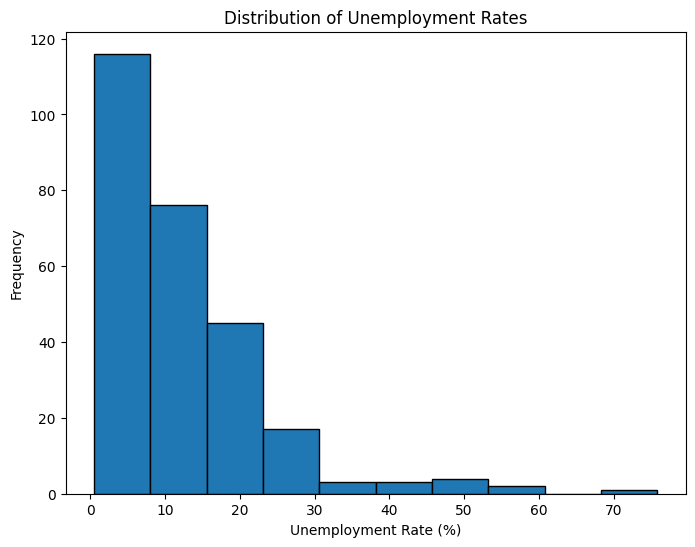

In [16]:
# Visualize the distribution of unemployment rates
#This histogram illustrates the distribution of unemployment rates, giving insights into the spread of rates across time periods.
plt.figure(figsize=(8, 6))
plt.hist(data['Estimated Unemployment Rate (%)'], bins=10, edgecolor='k')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

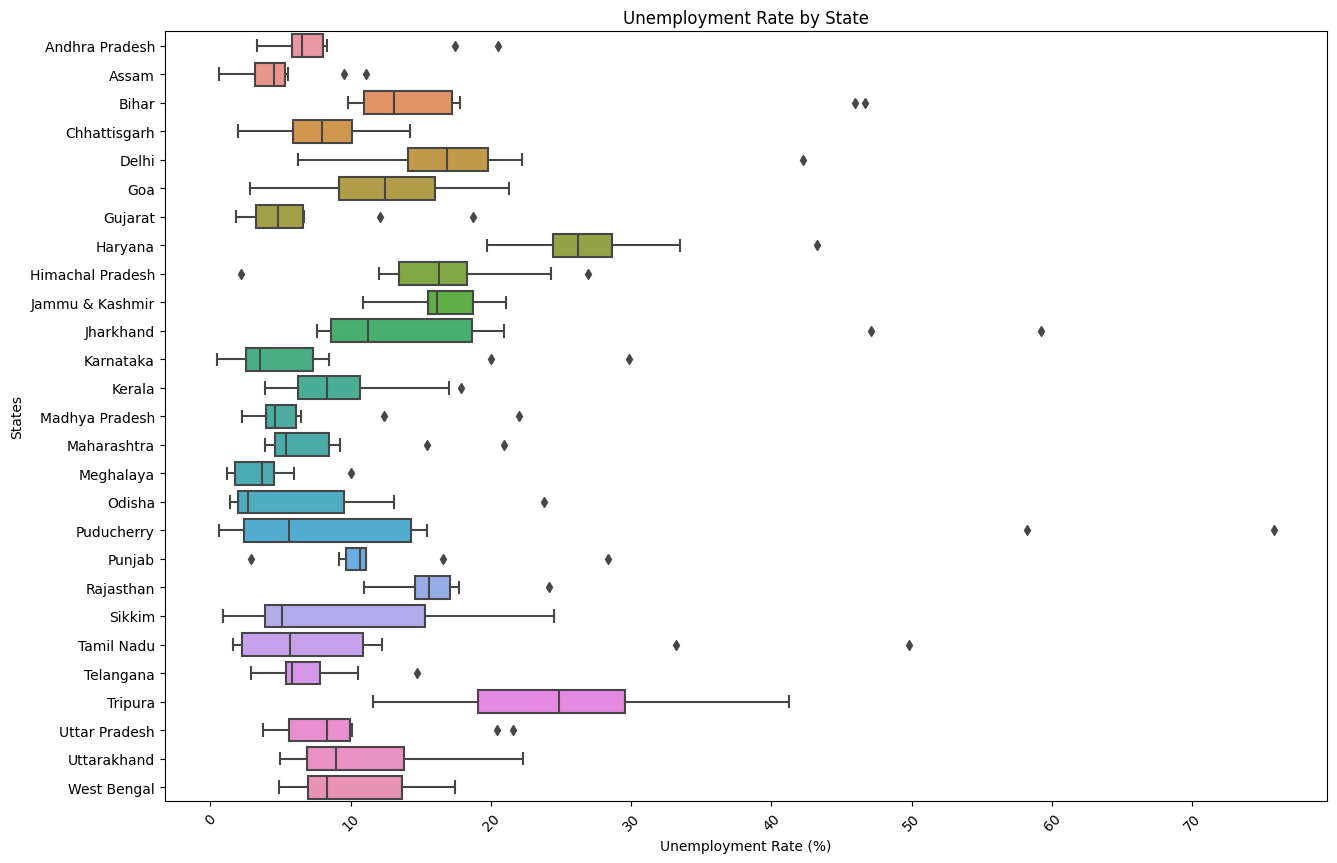

In [17]:
# Visualize the spread of unemployment rates by State
# This box plot displays the variation in unemployment rates by States, helping us to identify the regions with higher or lower rates.
plt.figure(figsize=(15, 10))
sns.boxplot(x='Estimated Unemployment Rate (%)', y='States', data=data)
plt.title('Unemployment Rate by State')
plt.xticks(rotation=45)
plt.ylabel('States')
plt.xlabel('Unemployment Rate (%)')
plt.show()

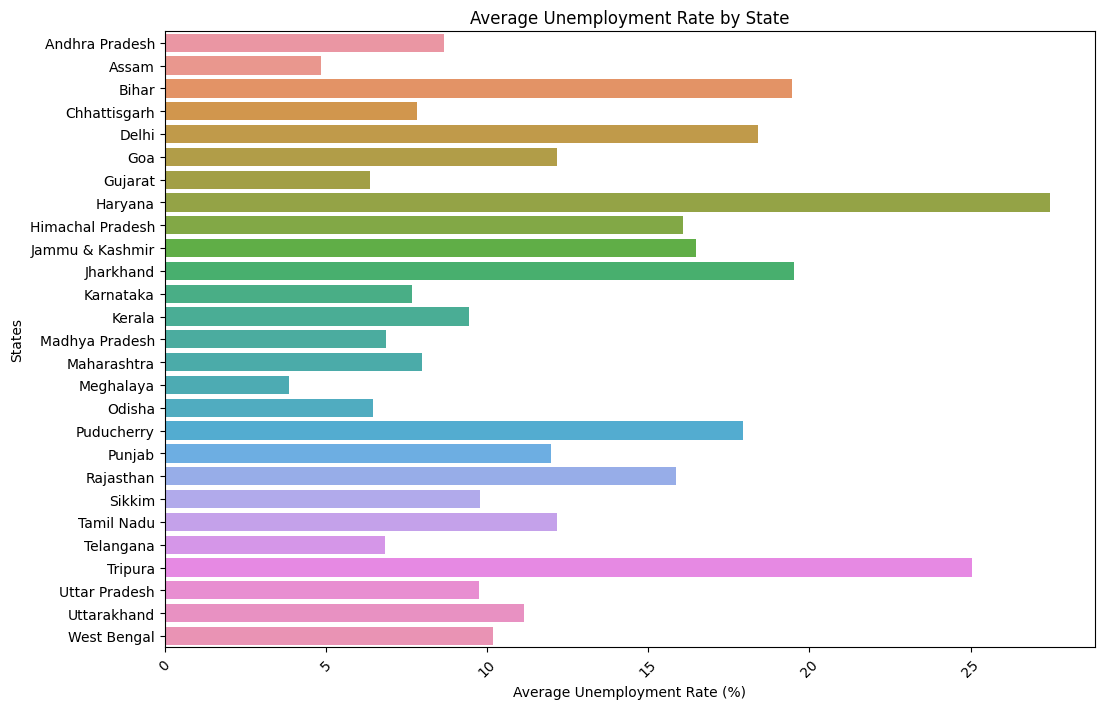

In [18]:
#Visualize the average unemployment rates by State
#This bar chart presents the average unemployment rates across states in India, highlighting states with the highest and lowest averages.
plt.figure(figsize=(12, 8))
sns.barplot(x='Estimated Unemployment Rate (%)', y='States', data=data, errorbar=None)
plt.title('Average Unemployment Rate by State')
plt.xticks(rotation=45)
plt.ylabel('States')
plt.xlabel('Average Unemployment Rate (%)')
plt.show()

In [19]:
# Visualize the average unemployment rates of different regions (North, South, etc.)
avg_unemployment_by_region = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
avg_unemployment_by_region

Region
North        15.889620
East         13.916000
Northeast    10.950263
South        10.454667
West          8.239000
Name: Estimated Unemployment Rate (%), dtype: float64

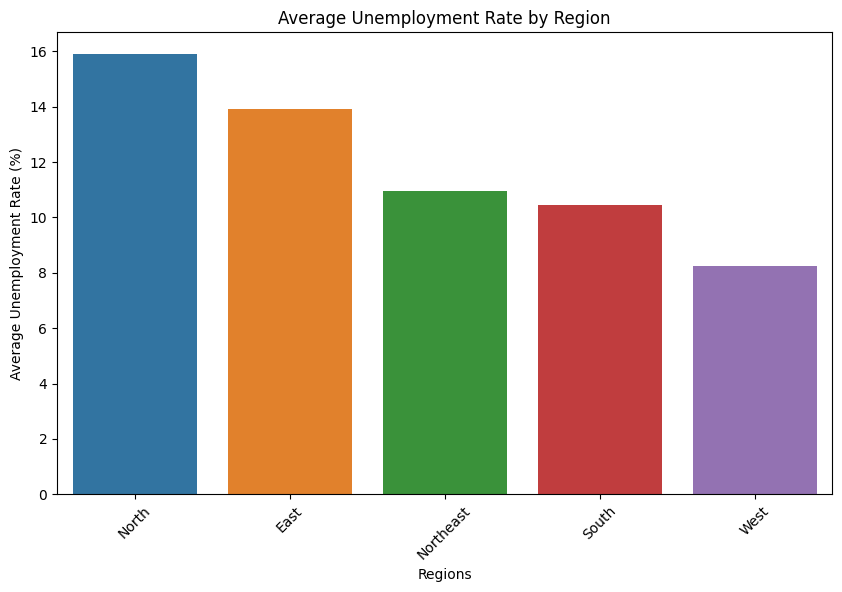

In [20]:
# This bar chart presents the average unemployment rates across regions (North, South, etc.), highlighting regions with the highest and lowest averages.
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_unemployment_by_region.index, y=avg_unemployment_by_region.values)
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.xlabel('Regions')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

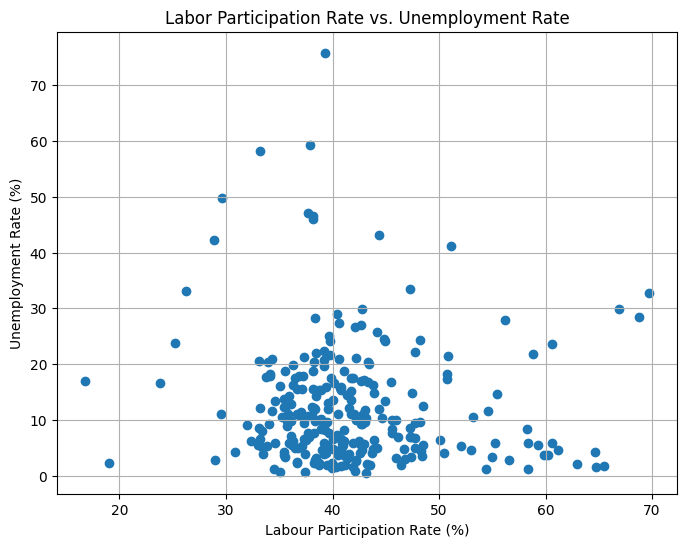

In [21]:
# Explore the relationship between unemployment rate and labor participation rate
# This scatter plot helps visualize the relationship between labor participation rate and unemployment rate, allowing us to identify any patterns or correlations.
plt.figure(figsize=(8, 6))
plt.scatter(data['Estimated Labour Participation Rate(%)'], data['Estimated Unemployment Rate (%)'])
plt.title('Labor Participation Rate vs. Unemployment Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

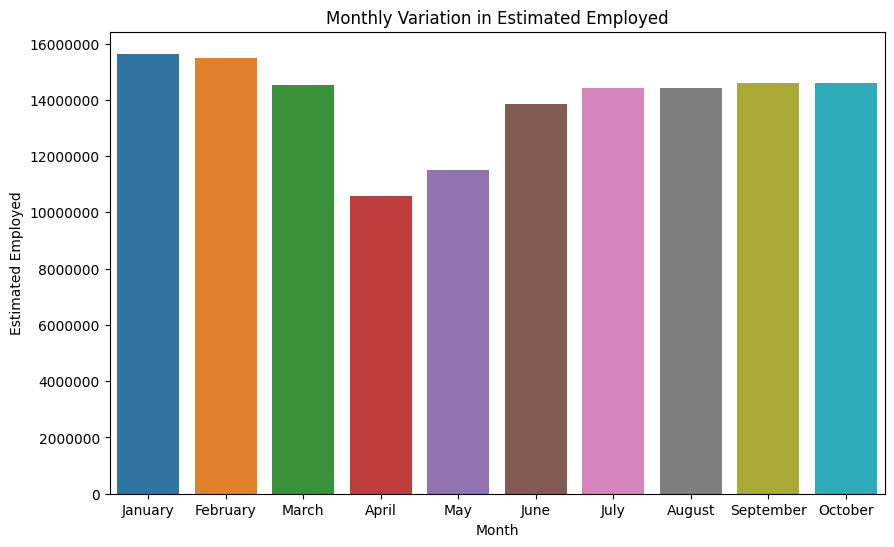

In [22]:
# Visualize monthly variation in estimated employment
# This bar chart presents the monthly variation in estimated employment, offering insights into seasonal patterns.
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Month_name', y='Estimated Employed', data=data, errorbar=None)
plt.title('Monthly Variation in Estimated Employed')
plt.xlabel('Month')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter('{:.0f}'.format)
plt.show()

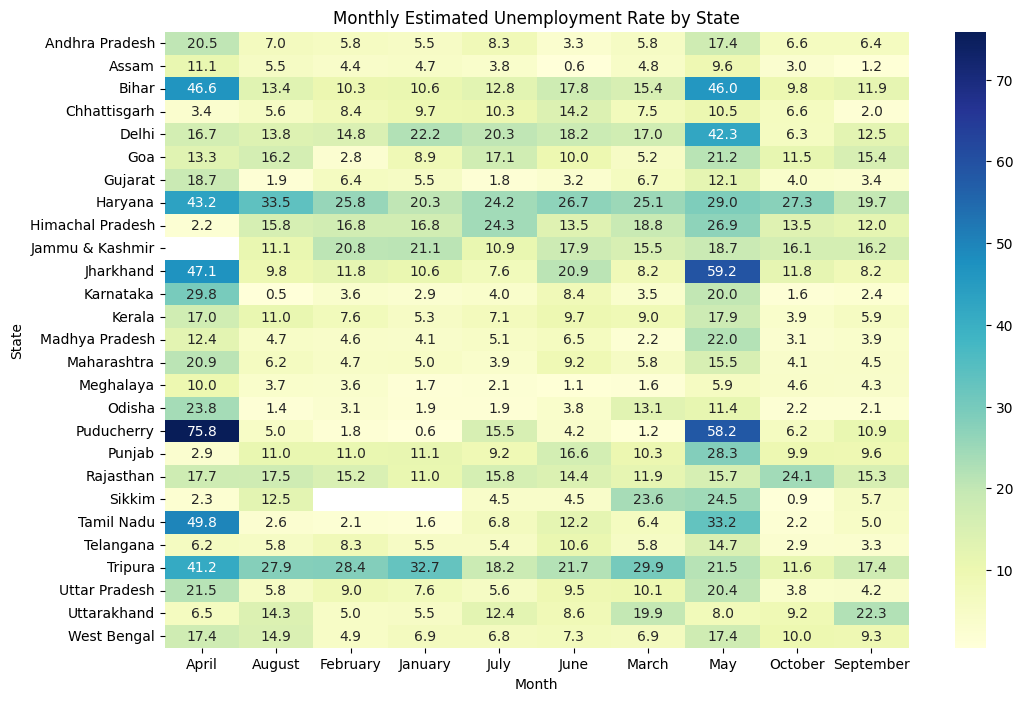

In [23]:
# This heatmap visualizes the monthly estimated unemployment rates by state, providing insights into how unemployment fluctuates throughout the year
heatmap_data = data.pivot(index='States', columns='Month_name', values='Estimated Unemployment Rate (%)')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Monthly Estimated Unemployment Rate by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()


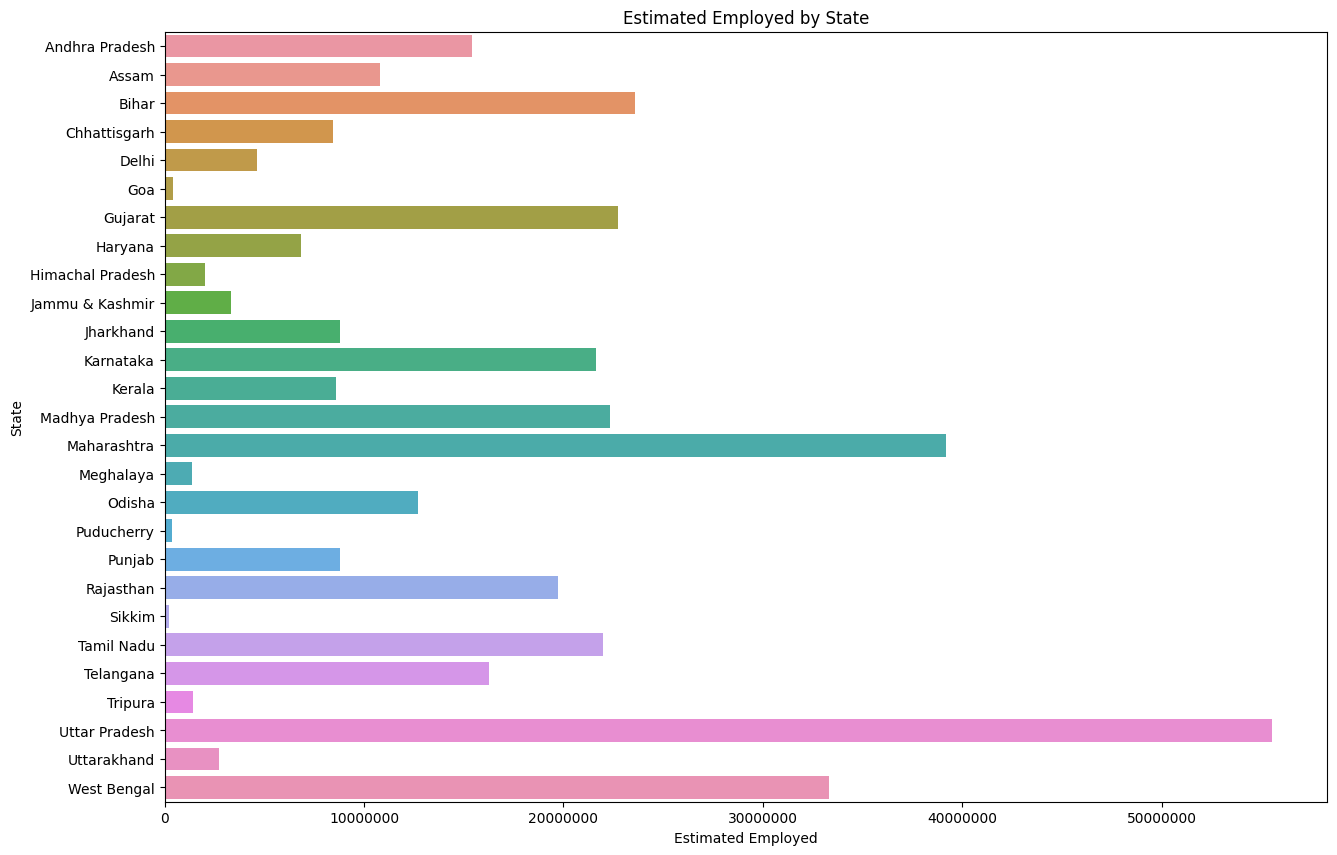

In [24]:
# Visualize estimated employed in each state
plt.figure(figsize=(15, 10))
ax=sns.barplot(x='Estimated Employed', y='States', data=data, errorbar=None)
plt.title('Estimated Employed by State')
plt.xlabel('Estimated Employed')
plt.ylabel('State')
plt.xticks(rotation=0)
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

In [25]:
# Select the columns you want to include in the correlation matrix
selected_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate(%)']

# Create a subset of the DataFrame with the selected columns
subset_data = data[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()
correlation_matrix

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%)
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540
Estimated Employed,-0.245176,1.000000,-0.047948
Estimated Labour Participation Rate(%),-0.073540,-0.047948,1.000000


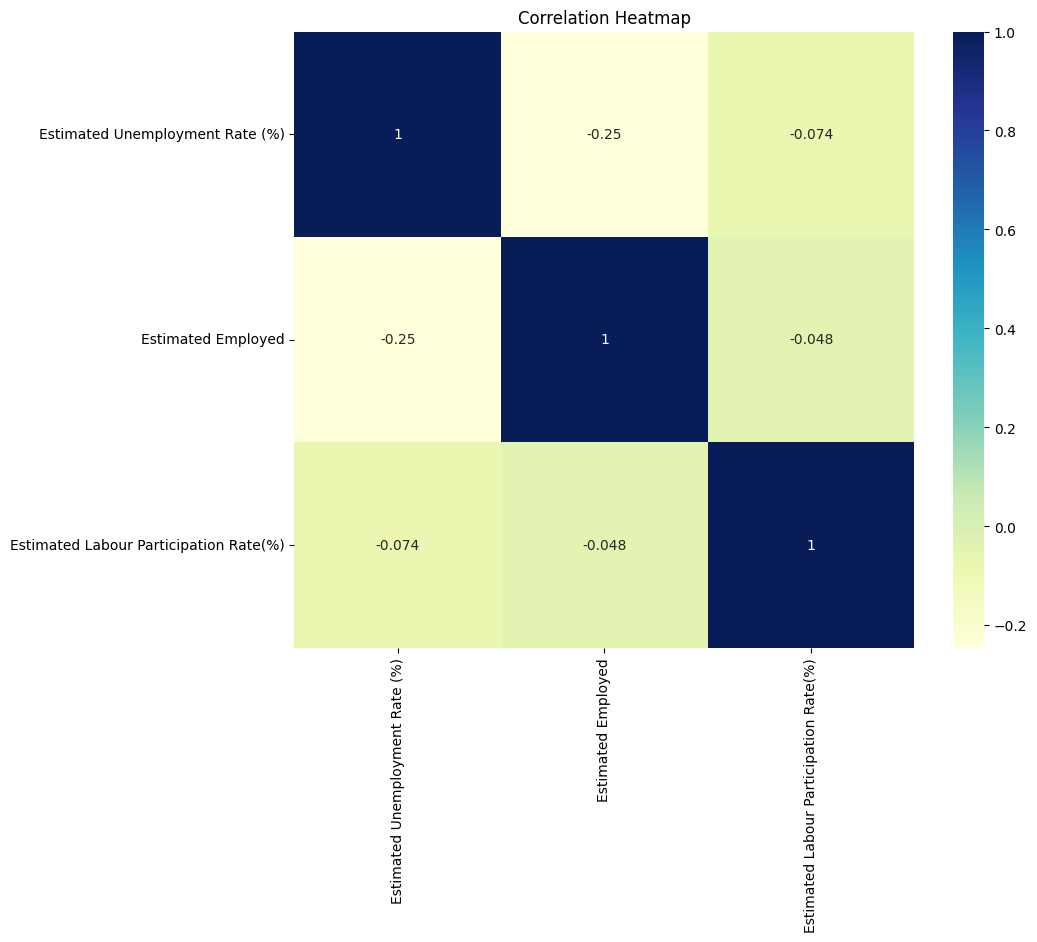

In [26]:
#This heatmap reveals the correlations between different features in the dataset, helping identify relationships between variables.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

## **Unemployment Before and After Lockdown**

In [27]:
# Set Pandas options to display numbers without scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# Calculate the estimated number of unemployed persons for each state
data['Estimated Unemployed'] = (data['Estimated Unemployment Rate (%)'] / 100) * data['Estimated Employed']
data['Estimated Unemployed']

0      911627
1      964612
2      919521
3     2325200
4     2263956
        ...  
262   2239948
263   2415942
264   4951508
265   3338627
266   3389462
Name: Estimated Unemployed, Length: 267, dtype: float64

In [28]:
data.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Region,Longitude,Latitude,Month_name,Month_Numerical,Estimated Unemployed
0,Andhra Pradesh,2020-01-31,5,16635535,41,South,16,80,January,1,911627
1,Andhra Pradesh,2020-02-29,6,16545652,41,South,16,80,February,2,964612
2,Andhra Pradesh,2020-03-31,6,15881197,39,South,16,80,March,3,919521
3,Andhra Pradesh,2020-04-30,21,11336911,33,South,16,80,April,4,2325200
4,Andhra Pradesh,2020-05-31,17,12988845,36,South,16,80,May,5,2263956


In [29]:
# Define the start and end dates of the lockdown period
lockdown_start_date = pd.to_datetime('24-03-2020', format='%d-%m-%Y')
lockdown_end_date = pd.to_datetime('01-07-2020', format='%d-%m-%Y')

In [30]:
data.columns

Index(['States', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)',
       'Region', 'Longitude', 'Latitude', 'Month_name', 'Month_Numerical',
       'Estimated Unemployed'],
      dtype='object')

In [31]:
# Filter data for the period before lockdown
before_lockdown_data = data[ data['Date'] < lockdown_start_date ]
before_lockdown_data.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Region,Longitude,Latitude,Month_name,Month_Numerical,Estimated Unemployed
0,Andhra Pradesh,2020-01-31,5,16635535,41,South,16,80,January,1,911627
1,Andhra Pradesh,2020-02-29,6,16545652,41,South,16,80,February,2,964612
10,Assam,2020-01-31,5,13051904,53,Northeast,26,93,January,1,608219
11,Assam,2020-02-29,4,10088268,41,Northeast,26,93,February,2,444893
20,Bihar,2020-01-31,11,26397671,38,East,25,85,January,1,2800793


In [32]:
# Get some information about the before_lockdown_data
before_lockdown_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 258
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   States                                  52 non-null     object        
 1   Date                                    52 non-null     datetime64[ns]
 2   Estimated Unemployment Rate (%)         52 non-null     float64       
 3   Estimated Employed                      52 non-null     int64         
 4   Estimated Labour Participation Rate(%)  52 non-null     float64       
 5   Region                                  52 non-null     object        
 6   Longitude                               52 non-null     float64       
 7   Latitude                                52 non-null     float64       
 8   Month_name                              52 non-null     object        
 9   Month_Numerical                         52 non-null    

In [33]:
# Filter data for the period after lockdown
after_lockdown_data = data[data['Date'] >= lockdown_end_date]
after_lockdown_data.head()

,States,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate(%),Region,Longitude,Latitude,Month_name,Month_Numerical,Estimated Unemployed
6,Andhra Pradesh,2020-07-31,8,15431615,39,South,16,80,July,7,1286997
7,Andhra Pradesh,2020-08-31,7,15251776,38,South,16,80,August,8,1061524
8,Andhra Pradesh,2020-09-30,6,15220312,37,South,16,80,September,9,974100
9,Andhra Pradesh,2020-10-31,7,15157557,37,South,16,80,October,10,998883
16,Assam,2020-07-31,4,10286757,41,Northeast,26,93,July,7,387811


In [34]:
# Get some information about the after_lockdown_data
after_lockdown_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 6 to 266
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   States                                  108 non-null    object        
 1   Date                                    108 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)         108 non-null    float64       
 3   Estimated Employed                      108 non-null    int64         
 4   Estimated Labour Participation Rate(%)  108 non-null    float64       
 5   Region                                  108 non-null    object        
 6   Longitude                               108 non-null    float64       
 7   Latitude                                108 non-null    float64       
 8   Month_name                              108 non-null    object        
 9   Month_Numerical                         108 non-null  

## **Before Lockdown**

In [35]:
# Calculate the number of unemployed persons before and after lockdown for each State
unemployed_before_lockdown = before_lockdown_data.groupby('States')['Estimated Unemployed'].sum().reset_index()
unemployed_before_lockdown

,States,Estimated Unemployed
0,Andhra Pradesh,1876239
1,Assam,1053111
2,Bihar,5505175
3,Chhattisgarh,1595835
4,Delhi,2159591
5,Goa,50483
6,Gujarat,2916147
7,Haryana,3451925
8,Himachal Pradesh,752166
9,Jammu & Kashmir,1397744


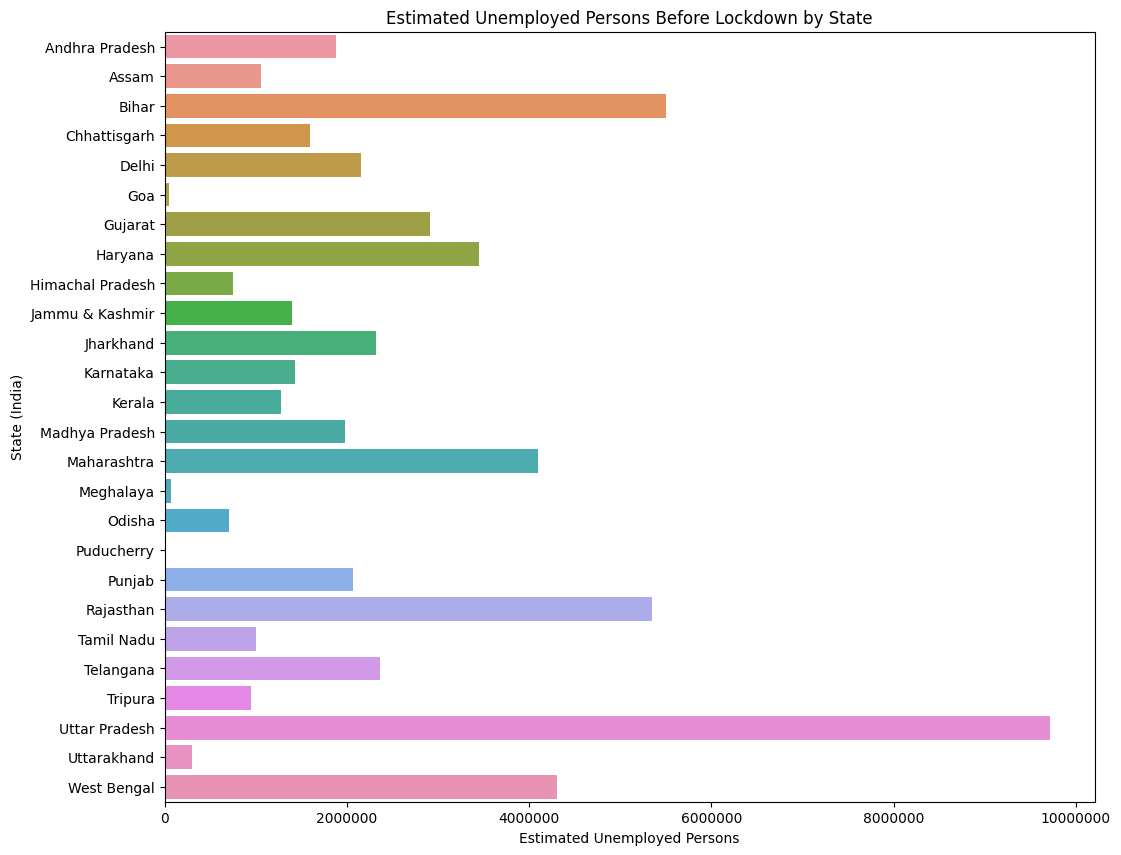

In [36]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=unemployed_before_lockdown, y='States', x='Estimated Unemployed')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.xticks(rotation=0)
plt.title('Estimated Unemployed Persons Before Lockdown by State')
plt.xlabel('Estimated Unemployed Persons')
plt.ylabel('State (India)')
plt.show()

### **Details Observed from the Above Bar Plots (Before Lockdown):**

- Uttar Pradesh faced the highest unemployment before the lockdown, with the number of unemployed individuals reaching nearly 10 million, highlighting significant economic challenges.

- Bihar also experienced a substantial number of unemployed persons, with figures consistently hovering around 6 million, indicating a notable pre-lockdown unemployment rate.

- Rajasthan fell within the range of 4 to 6 million unemployed individuals, showcasing a moderate but significant impact on employment before the lockdown.

- West Bengal reported over 4 million unemployed persons, signifying substantial economic issues in the pre-lockdown period.

- Maharashtra had more than 4 million unemployed individuals, though slightly lower than West Bengal, indicating considerable employment concerns prior to the lockdown.

## **After Lockdown**

In [37]:
unemployed_after_lockdown = after_lockdown_data.groupby('States')['Estimated Unemployed'].sum().reset_index()
unemployed_after_lockdown

,States,Estimated Unemployed
0,Andhra Pradesh,4321503
1,Assam,1457468
2,Bihar,12121474
3,Chhattisgarh,2137473
4,Delhi,2464835
5,Goa,265644
6,Gujarat,2775313
7,Haryana,7260555
8,Himachal Pradesh,1417755
9,Jammu & Kashmir,1788111


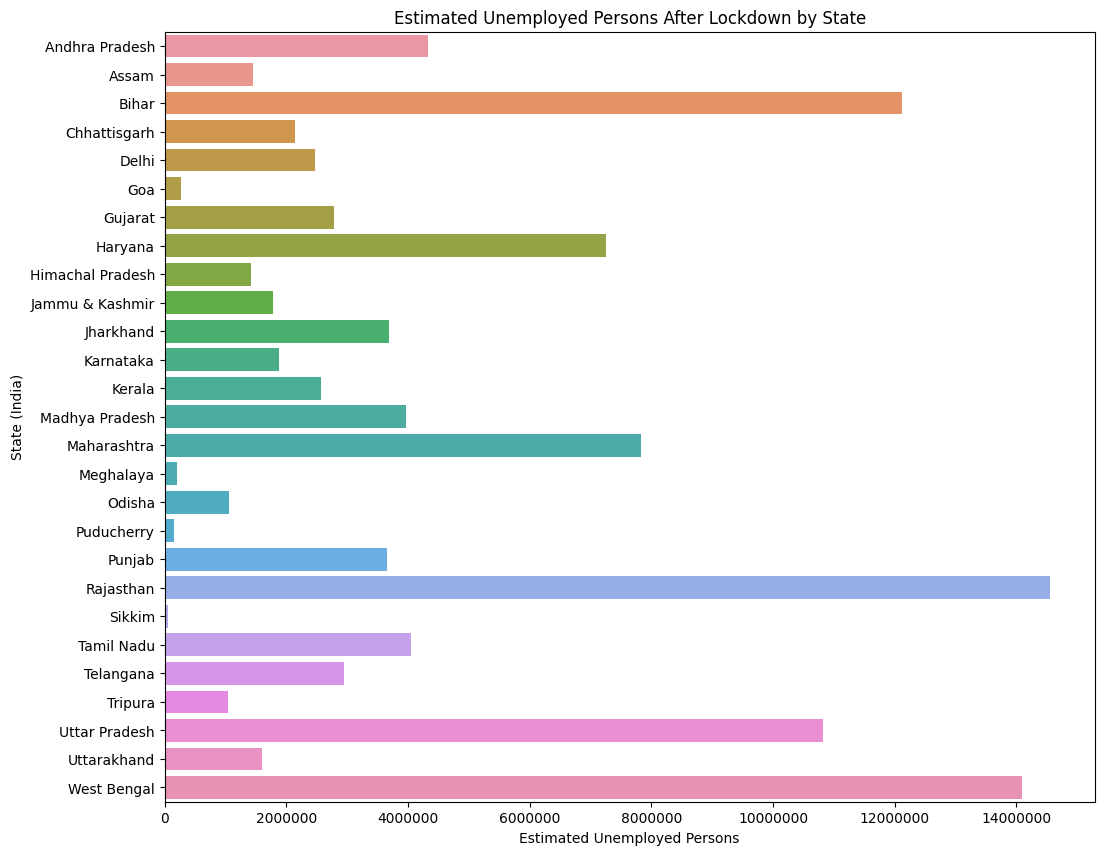

In [38]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=unemployed_after_lockdown, y='States', x='Estimated Unemployed')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.xticks(rotation=0)
plt.title('Estimated Unemployed Persons After Lockdown by State')
plt.xlabel('Estimated Unemployed Persons')
plt.ylabel('State (India)')
plt.show()

### **Details Observed from the Above Bar Plots (After Lockdown):**

- Rajasthan witnessed the highest surge in unemployment after the lockdown, with a substantial increase to more than 14 million individuals unemployed, indicating significant post-lockdown economic challenges.

- West Bengal also experienced a considerable rise in unemployment, surpassing 14 million, although slightly lower than Rajasthan, highlighting substantial post-lockdown employment concerns.

- Bihar reported a noteworthy increase in unemployment, reaching over 12 million individuals, reflecting the post-lockdown impact on employment.

- Uttar Pradesh faced a moderate increase in unemployment, with numbers ranging between 10 and 12 million individuals after the lockdown.

- Maharashtra's unemployment figures increased to nearly 8 million, indicating significant employment challenges post-lockdown.

- Haryana saw an increase in unemployment, with numbers between 6 and 8 million individuals, reflecting the post-lockdown economic scenario.

In [39]:
# Merge the two datasets for comparison
comparison_data = unemployed_before_lockdown.merge(unemployed_after_lockdown, on='States', suffixes=('_before', '_after'))
comparison_data

,States,Estimated Unemployed_before,Estimated Unemployed_after
0,Andhra Pradesh,1876239,4321503
1,Assam,1053111,1457468
2,Bihar,5505175,12121474
3,Chhattisgarh,1595835,2137473
4,Delhi,2159591,2464835
5,Goa,50483,265644
6,Gujarat,2916147,2775313
7,Haryana,3451925,7260555
8,Himachal Pradesh,752166,1417755
9,Jammu & Kashmir,1397744,1788111


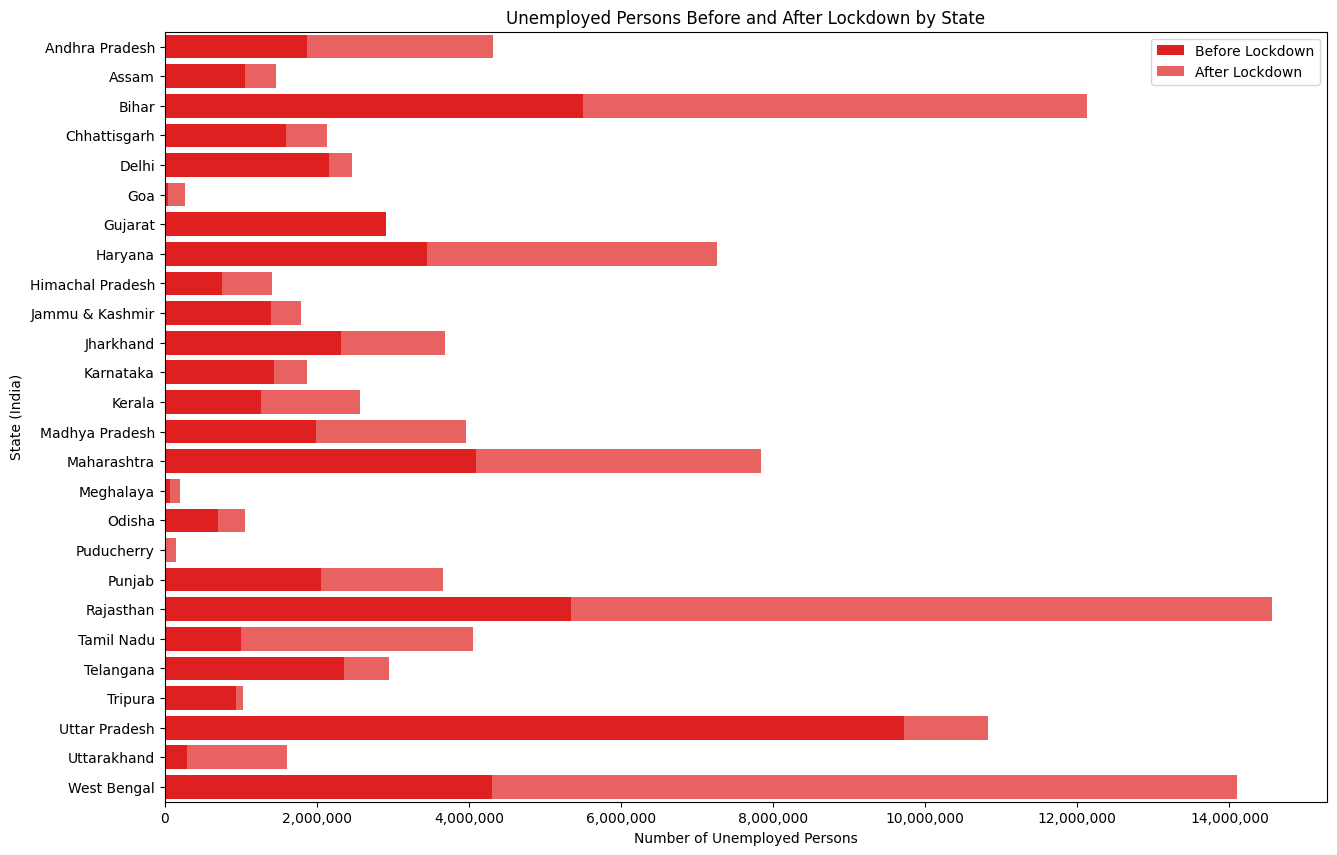

In [40]:
from matplotlib.ticker import FixedLocator

# Create a bar chart to visualize the data
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Estimated Unemployed_before', y='States', data=comparison_data, color='red', label='Before Lockdown')
sns.barplot(x='Estimated Unemployed_after', y='States', data=comparison_data, color='red', alpha=0.7, label='After Lockdown')

# Get the current tick labels on the x-axis
xtick_labels = ax.get_xticks()

# Specify the tick locations explicitly
ax.xaxis.set_major_locator(FixedLocator(xtick_labels))

# Set the tick labels to be integers (number of unemployed persons)
ax.set_xticklabels([f'{int(label):,}' for label in xtick_labels])

plt.title('Unemployed Persons Before and After Lockdown by State')
plt.ylabel('State (India)')
plt.xlabel('Number of Unemployed Persons')
plt.xticks(rotation=0)
plt.legend()
plt.show()

## **Details Observed from the "Before Lockdown" and "After Lockdown" Bar Plots:**

- "Before Lockdown," **Uttar Pradesh** exhibited the **highest number of unemployed persons**, with figures reaching nearly 10 million. It was followed by Bihar, with a consistent count of around **6 million unemployed individuals**.

- "After Lockdown," **Rajasthan** witnessed the most significant increase in unemployment, with numbers **exceeding 14 million**. **West Bengal, Bihar, and Uttar Pradesh** also experienced substantial rises in unemployment, ranging **from 10 to 14 million**.

- Maharashtra showed a relatively stable unemployment rate, with **around 8 million unemployed individuals both before and after lockdown**. **Haryana's** unemployment **remained consistent** within the **range of 4 to 8 million**.

### **These observations provide insights into how unemployment was affected before and after the lockdown measures were implemented in various Indian states.**

In [93]:
# Calculate the difference in unemployed persons and create columns for reduction and increase
difference_data = unemployed_after_lockdown.copy()
difference_data['Estimated Unemployed'] = unemployed_after_lockdown['Estimated Unemployed'] - unemployed_before_lockdown['Estimated Unemployed']
difference_data['Estimated Unemployment Reduction'] = difference_data['Estimated Unemployed'].apply(lambda x: x if x < 0 else 0)
difference_data['Estimated Unemployment Increase'] = difference_data['Estimated Unemployed'].apply(lambda x: x if x > 0 else 0)
difference_data

,States,Estimated Unemployed,Estimated Unemployment Reduction,Estimated Unemployment Increase
0,Andhra Pradesh,2445264,0,2445264
1,Assam,404357,0,404357
2,Bihar,6616299,0,6616299
3,Chhattisgarh,541637,0,541637
4,Delhi,305244,0,305244
5,Goa,215161,0,215161
6,Gujarat,-140834,-140834,0
7,Haryana,3808630,0,3808630
8,Himachal Pradesh,665589,0,665589
9,Jammu & Kashmir,390367,0,390367


In [96]:
#This interactive bar chart created using Plotly distinguishes 'Unemployment Reduction' in green and 'Unemployment Increase' in red, making it effortless to comprehend the changes in employment before and after the lockdown.

import plotly.graph_objects as go
# Create a figure
fig = go.Figure()

# Add a bar trace for Estimated Unemployment Reduction (green)
fig.add_trace(go.Bar(
    x=difference_data['States'],
    y=difference_data['Estimated Unemployment Reduction'],
    name='Estimated Unemployment Reduction',
    marker_color='green'
))

# Add a bar trace for Estimated Unemployment Increase (red)
fig.add_trace(go.Bar(
    x=difference_data['States'],
    y=difference_data['Estimated Unemployment Increase'],
    name='Estimated Unemployment Increase',
    marker_color='red'
))

# Update layout and labels
fig.update_layout(
    title='Unemployment Reduction and Increase Before and After Lockdown by State',
    xaxis_title='States',
    yaxis_title='Unemployment Change',
    xaxis_tickangle=-45
)

# Show the interactive chart
fig.show()

## **Information Obtained from the above Bar charts:**

- Gujarat witnessed a reduction in unemployment by approximately 140.8 thousand individuals.
- Tripura experienced a substantial decrease in unemployment, with a reduction of approximately 8.7 million individuals.
- Uttarakhand saw a decrease in unemployment by approximately 2.7 million individuals.
- Sikkim exhibited a decrease in unemployment, with a reduction of approximately 940.6 thousand individuals.


These states demonstrated a significant reduction in unemployment, while many others experienced an increase in unemployment during the specified period.

## **Project Summary:**

### This Unemployment Analysis Python project explores unemployment rates before and after lockdown, offering insights into the impact of COVID-19 measures on employment. We preprocess and visualize data, analyzing distribution, regional variations, and correlations. Key visualizations include unemployment distributions, state-wise rates, and lockdown effects. The project culminates in an interactive Plotly chart displaying reductions (in green) and increases (in red) in unemployment before and after lockdown, contributing valuable insights into India's changing employment landscape during the pandemic.